# import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import scale, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')


# Read Data

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Check Missing Values

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- insight : All values in **Unnamed: 32** is Null values , so i will drop it

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Check duplicated Rows

In [ ]:
df.duplicated().sum()

0

- insight : there is no duplicated Rows

### Exploring Target Feature

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='diagnosis', ylabel='count'>

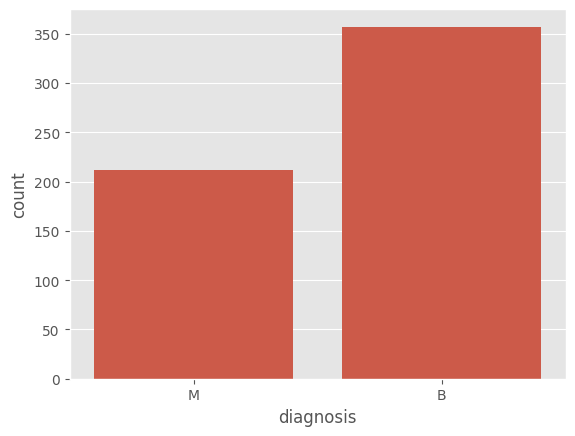

In [ ]:
sns.countplot(data=df,x=df['diagnosis'])

- insight: percentage of **benign** is more than **malignant**

### Feature Distrubtion

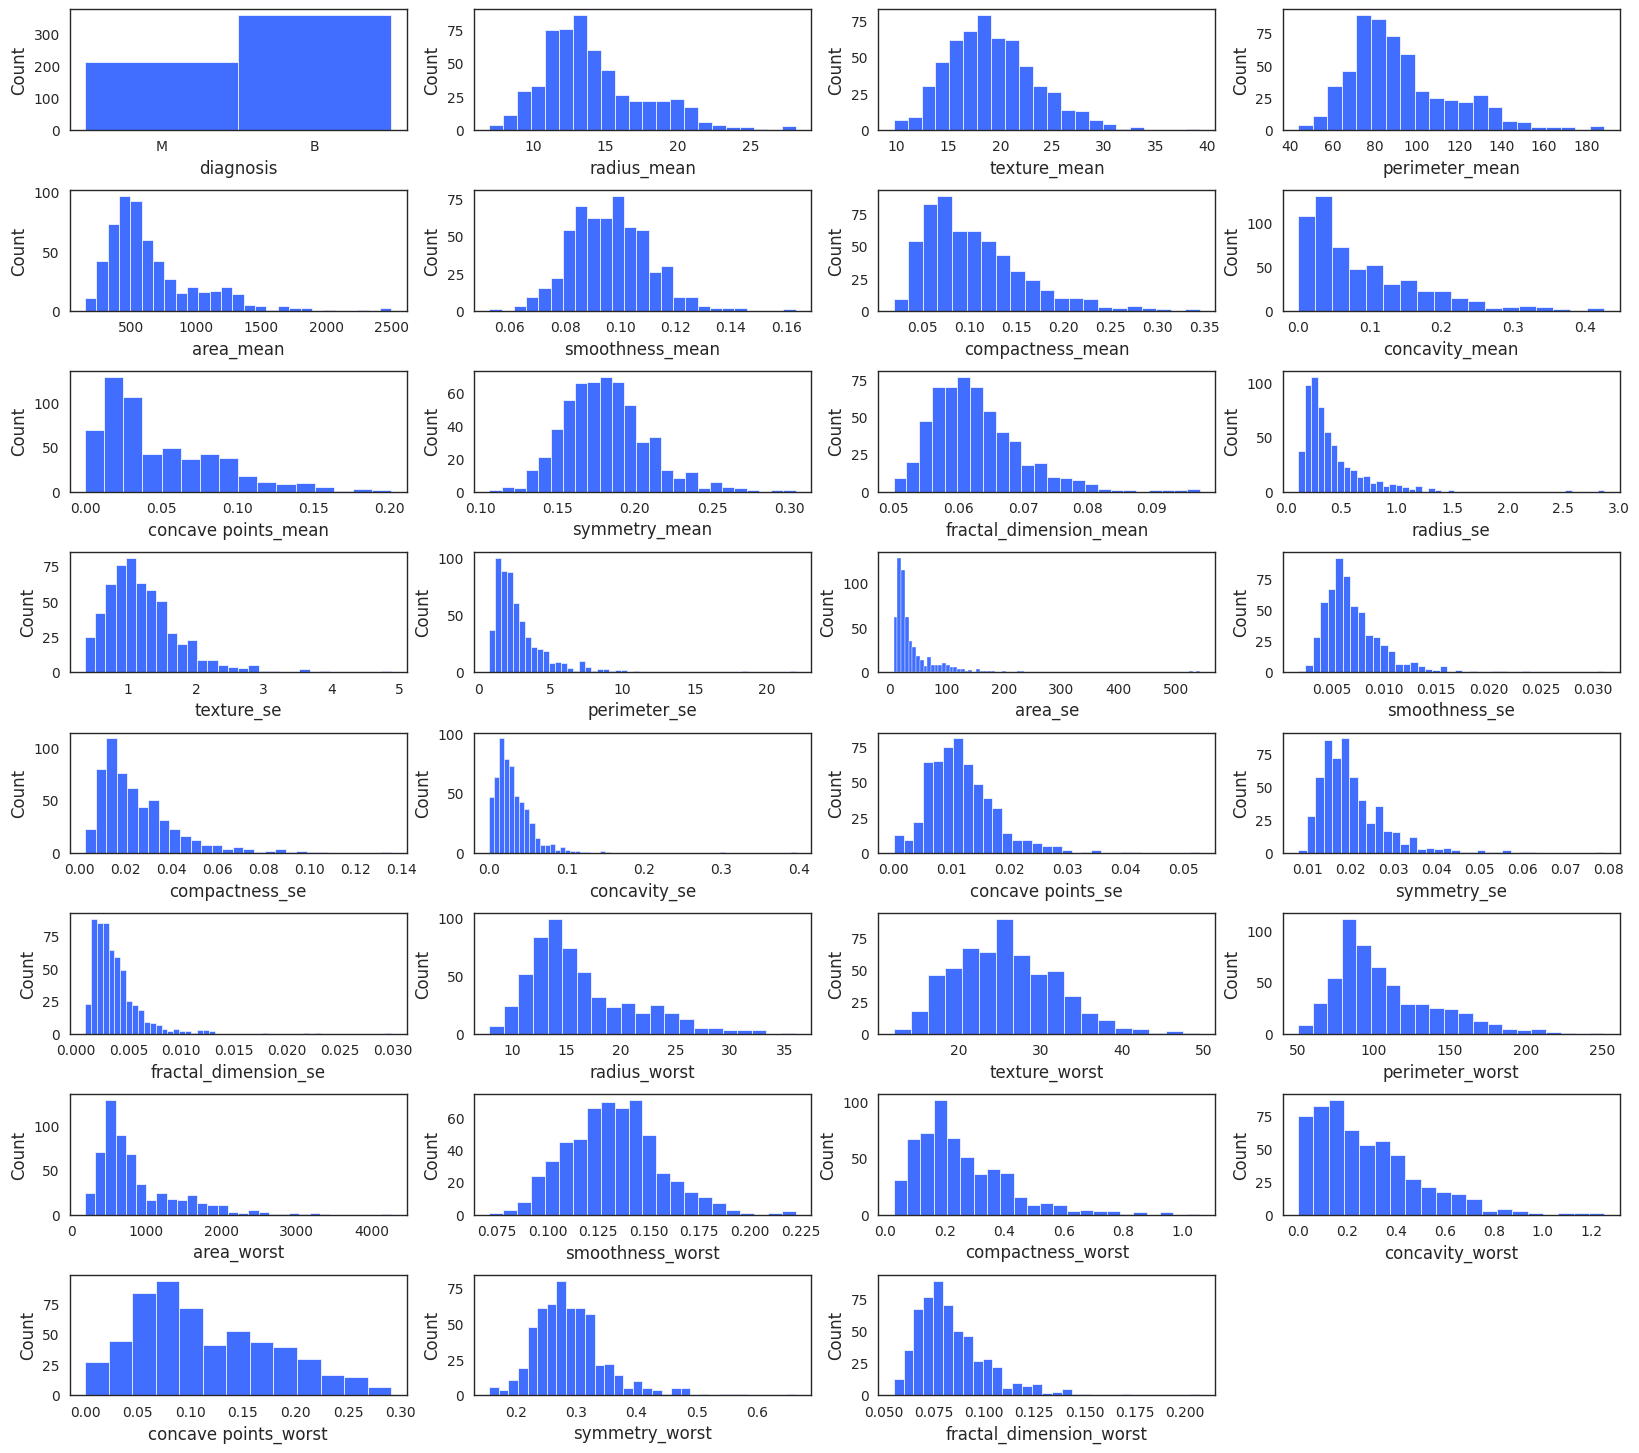

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(8,4,i)
    sns.histplot(data=df, x=name,palette="pastel")
    i = i + 1

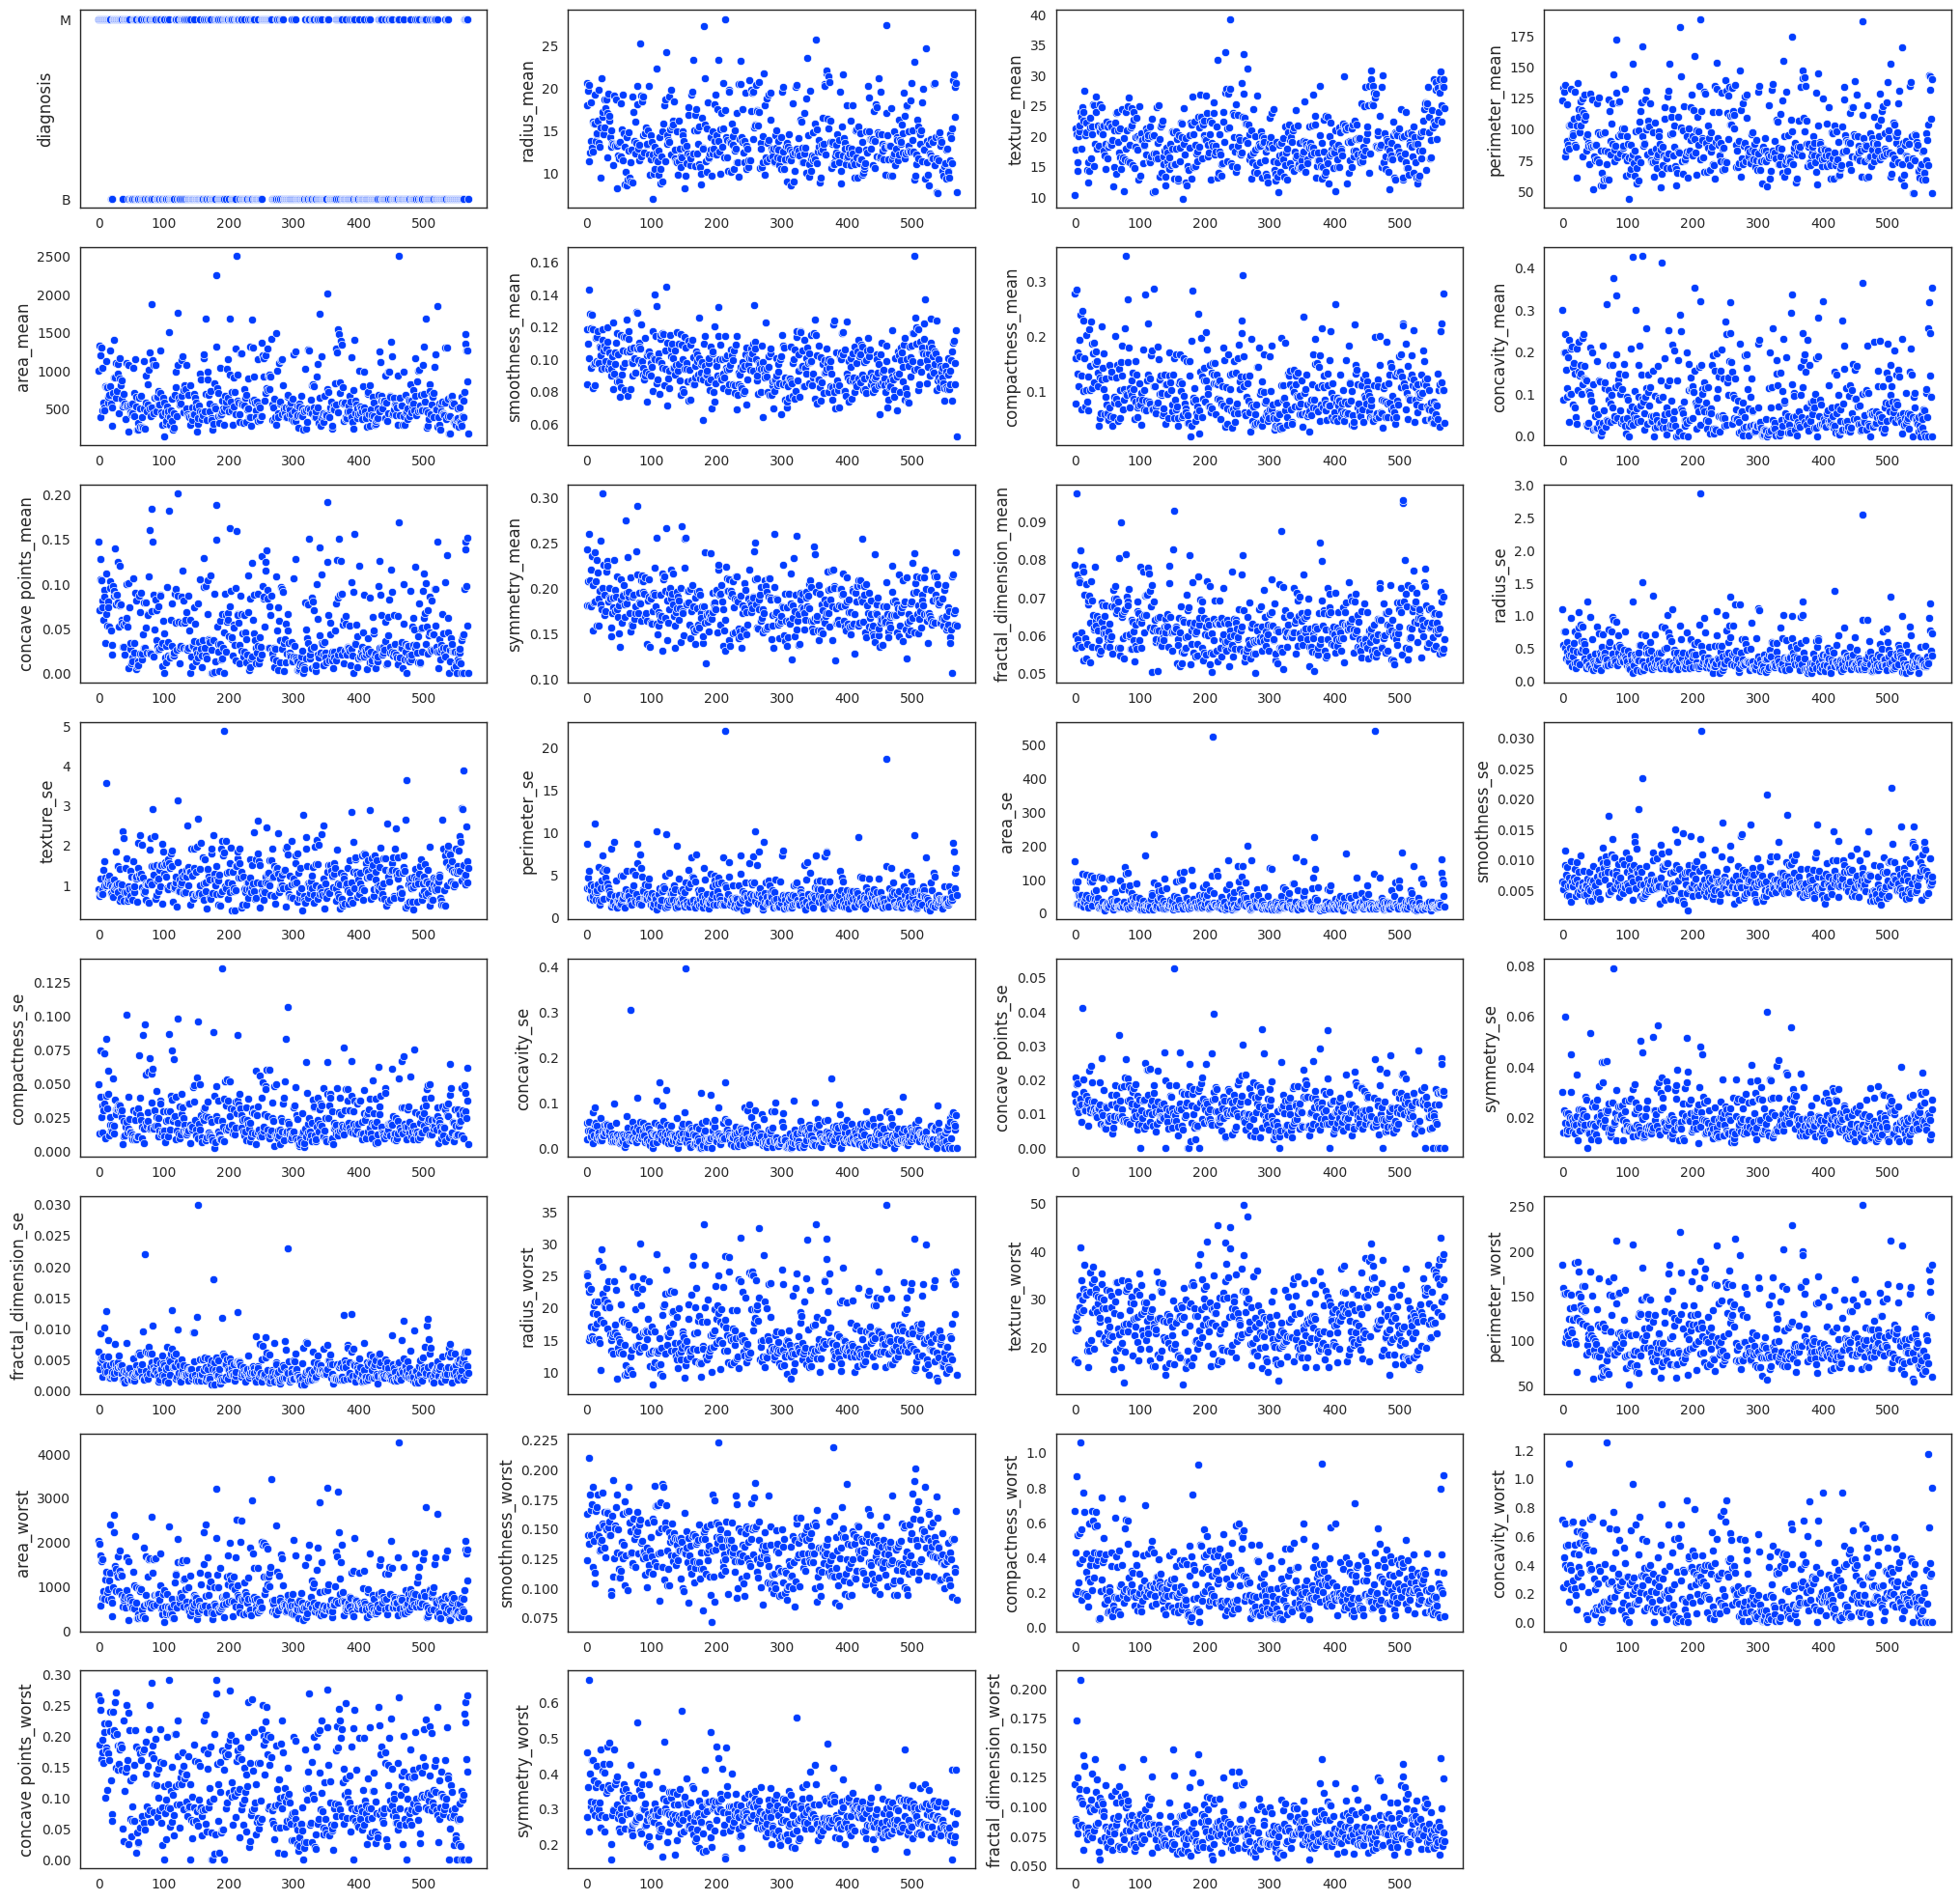

In [ ]:
plt.figure(figsize=(25,25))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.2)
i = 1;
for name in df.columns:
    plt.subplot(8,4,i)
    sns.scatterplot(data=df[name])
    i = i + 1

- insight: from scatter plot there is outliers in many features

### Each Features vs Target Feature


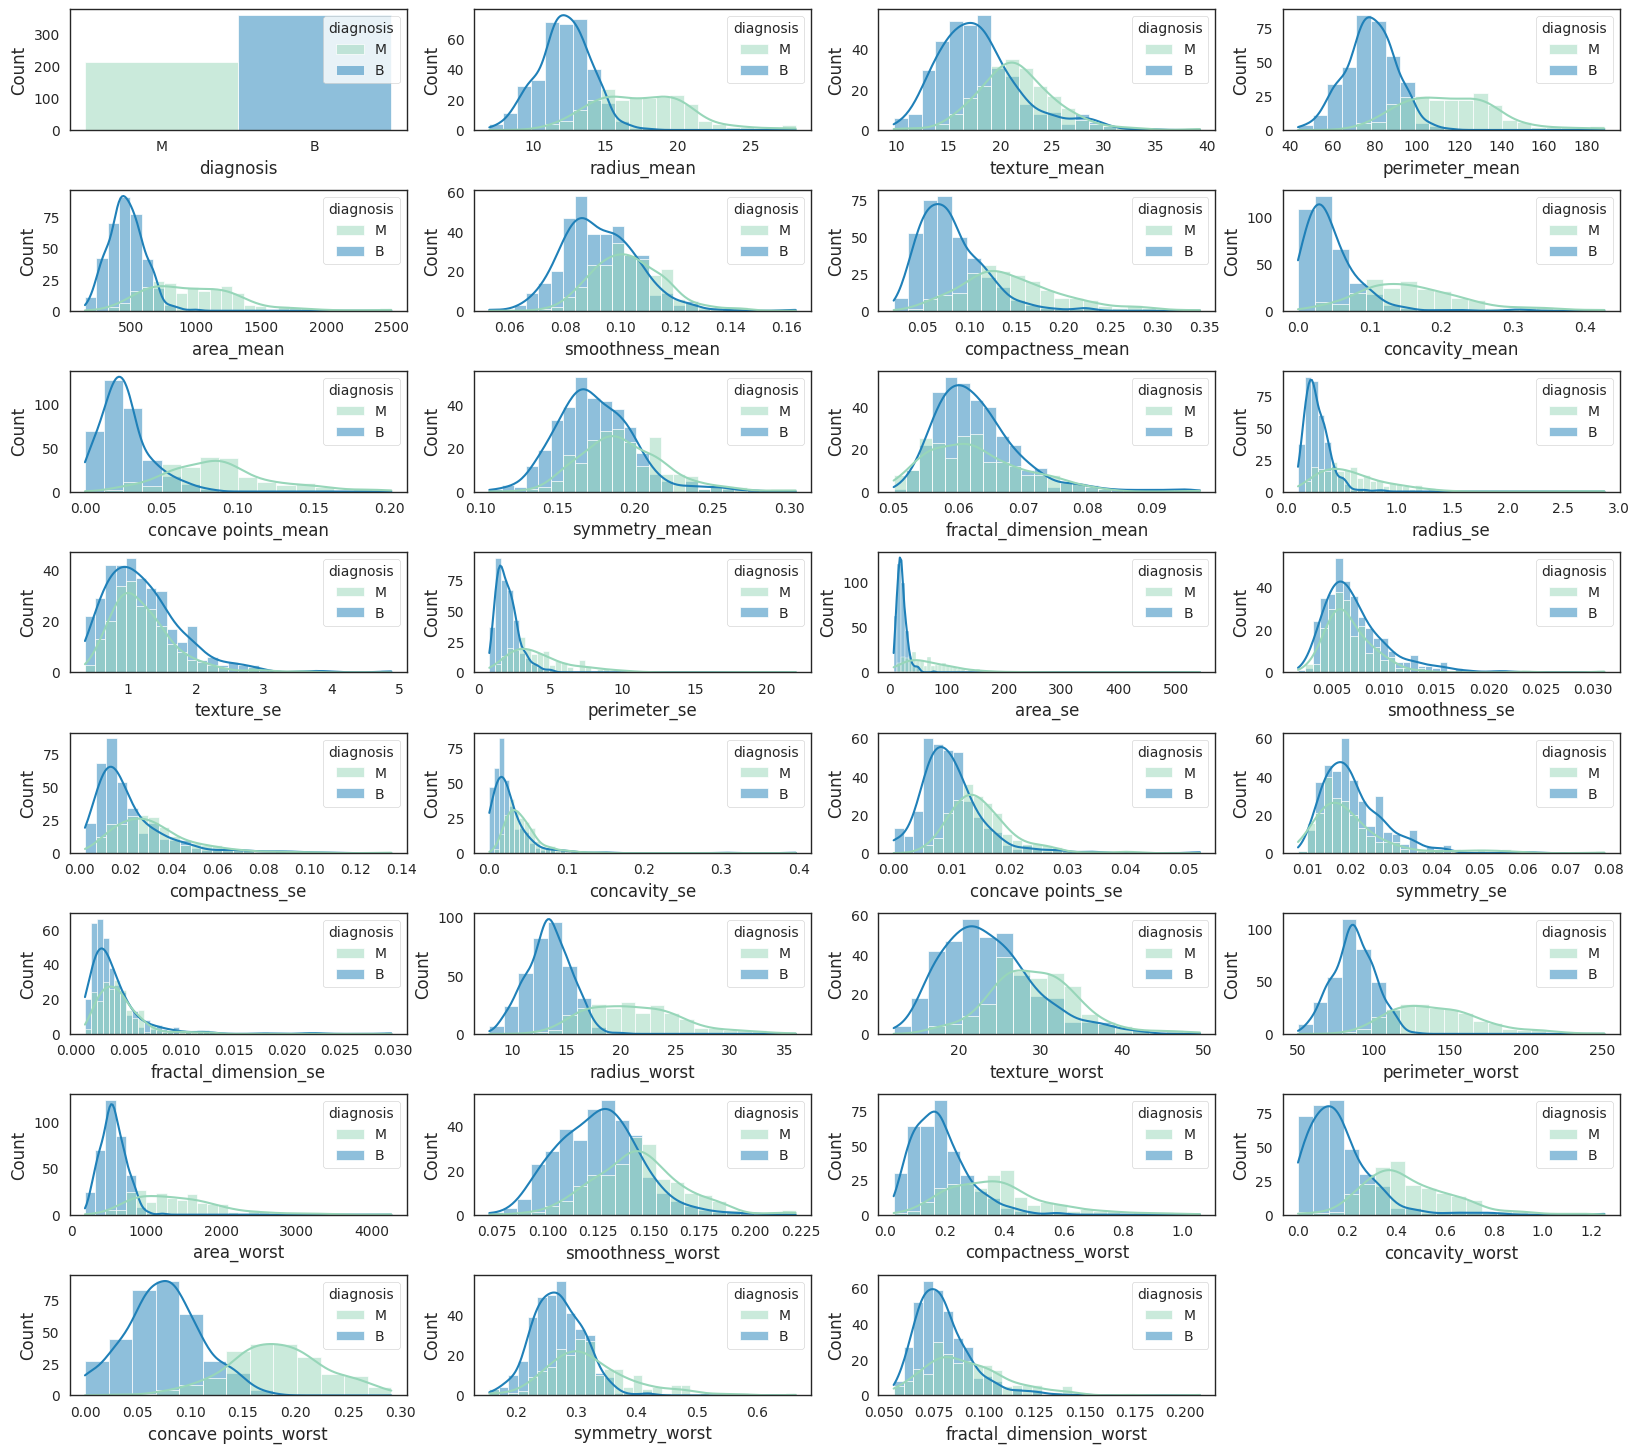

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(8,4,i)
    sns.histplot(data=df, x=name, hue="diagnosis",kde=True,palette="YlGnBu")
    i = i + 1

### correlation between features

<Axes: >

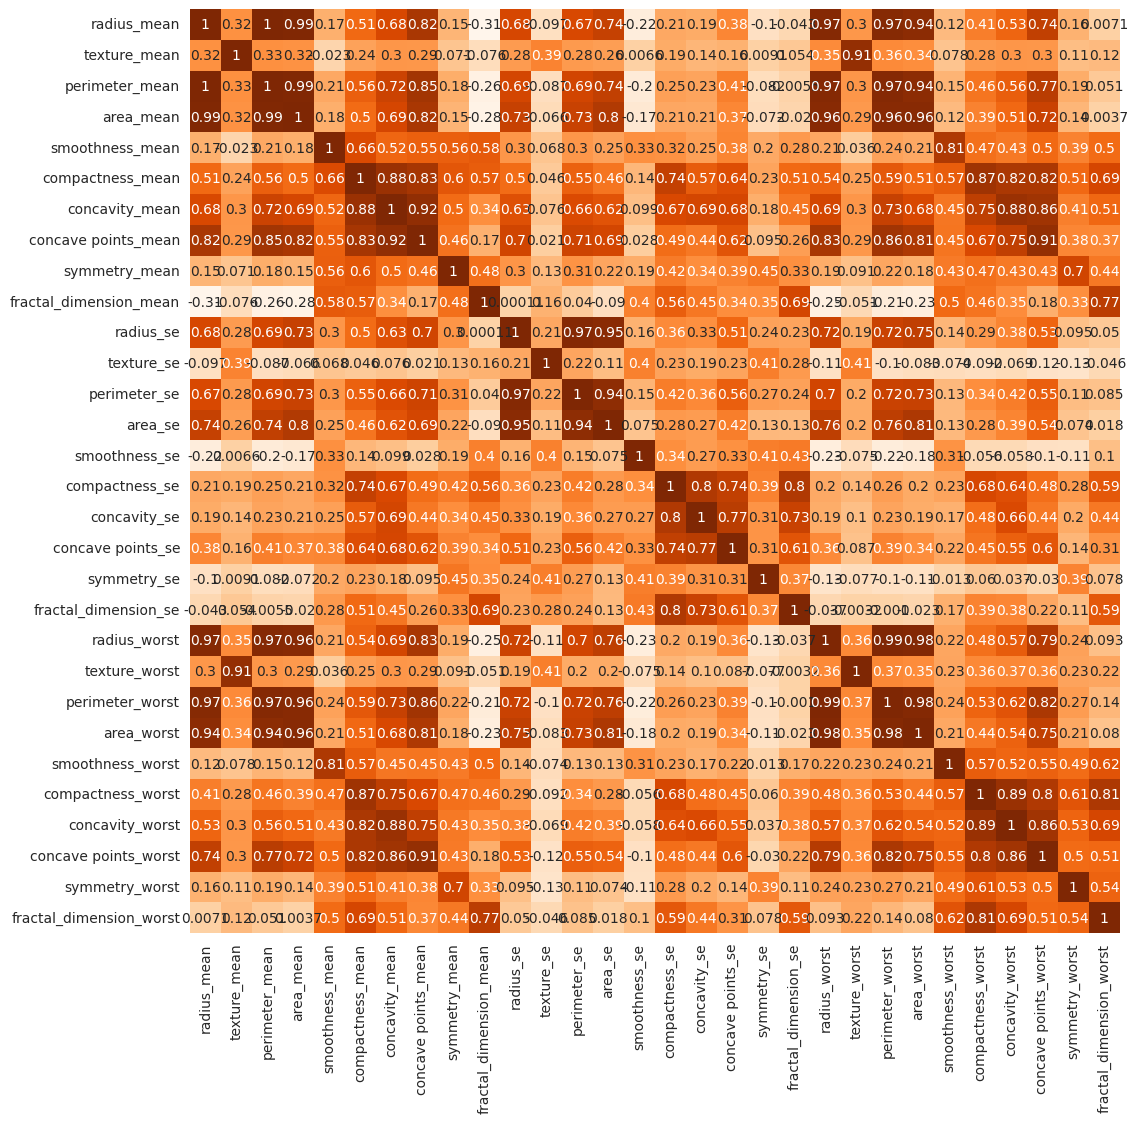

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='Oranges',cbar=False)

- isight: from heatmap there is **High correlation** between many feature, so we will drop some of them

# Data Preprocessing

### Split data to train and validation

In [ ]:
y = df['diagnosis']
x = df.drop('diagnosis',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Encoding for diagnosis


In [ ]:
y_train = y_train.map({'M':1,'B':0})
y_test = y_test.map({'M':1,'B':0})

### Feature Selection by Correlation (heatmap)

<Axes: >

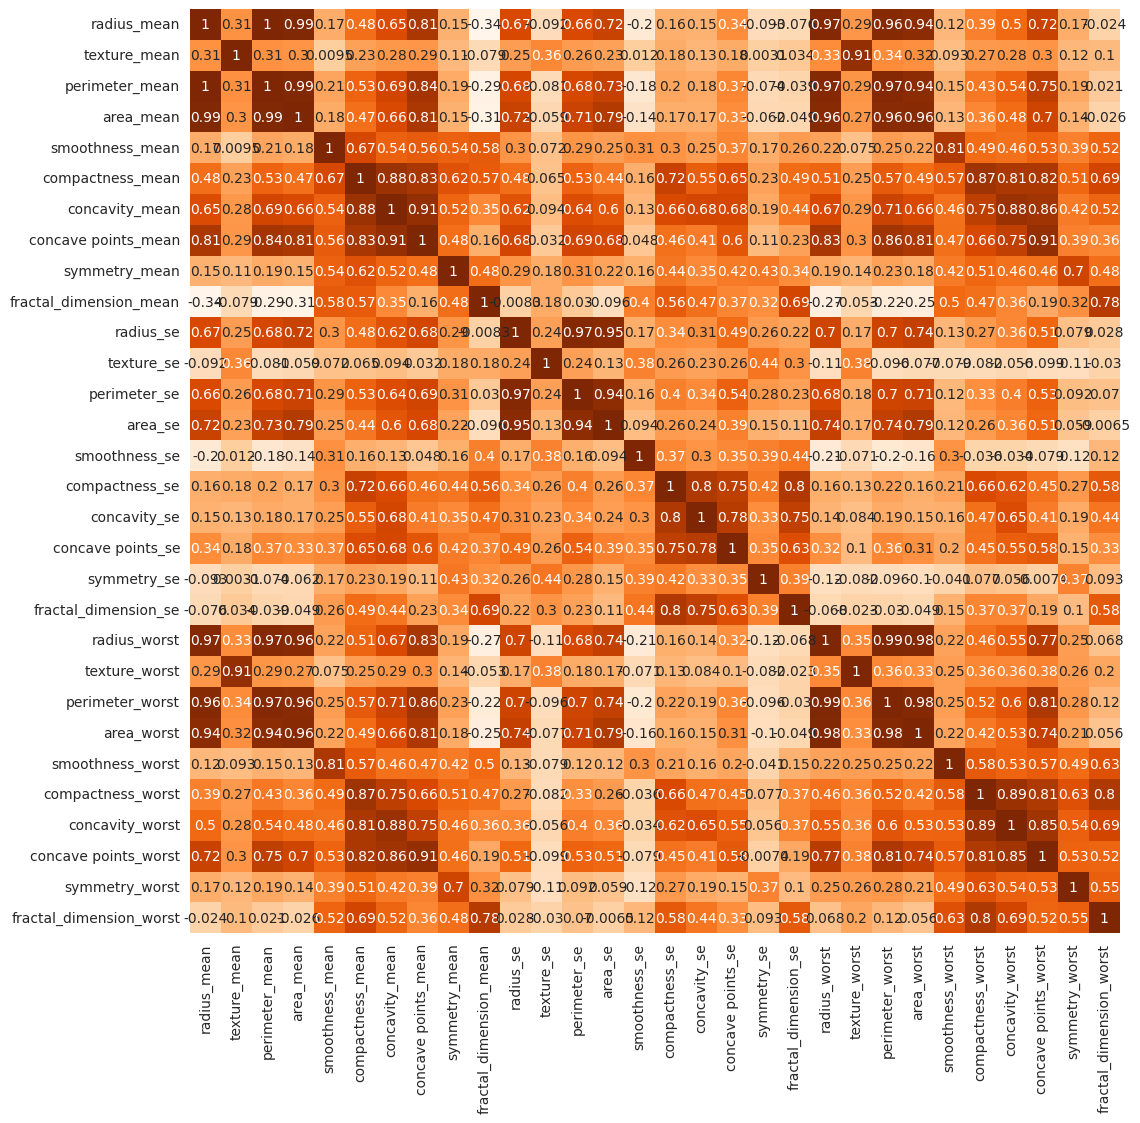

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True,cmap='Oranges',cbar=False)

In [ ]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
              'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'compactness_se','concave points_se','texture_worst','area_worst']

In [ ]:
x_train = x_train.drop(drop_list,axis=1)
x_test = x_test.drop(drop_list,axis=1)
x_train.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
68,17.33,250.5,0.10660,0.31300,0.2111,0.08046,1.1940,17.67,0.009549,0.303800,0.04197,0.009559,0.14820,1.25200,0.4228,0.11750
181,26.57,1311.0,0.11410,0.24870,0.2395,0.07398,0.7629,81.46,0.004253,0.038720,0.01798,0.005295,0.14910,0.67800,0.4098,0.12840
63,13.86,260.9,0.07721,0.05988,0.2341,0.06963,2.2650,23.52,0.008738,0.043120,0.04192,0.005822,0.09836,0.13970,0.3282,0.08490
248,25.22,347.0,0.09657,0.02379,0.1897,0.06329,1.4930,16.64,0.007189,0.010810,0.02158,0.002619,0.14990,0.11250,0.3409,0.08147
60,14.88,311.9,0.11340,0.01084,0.2743,0.06960,1.4410,34.62,0.007514,0.007665,0.04183,0.005953,0.12750,0.02168,0.3557,0.08020


<Axes: >

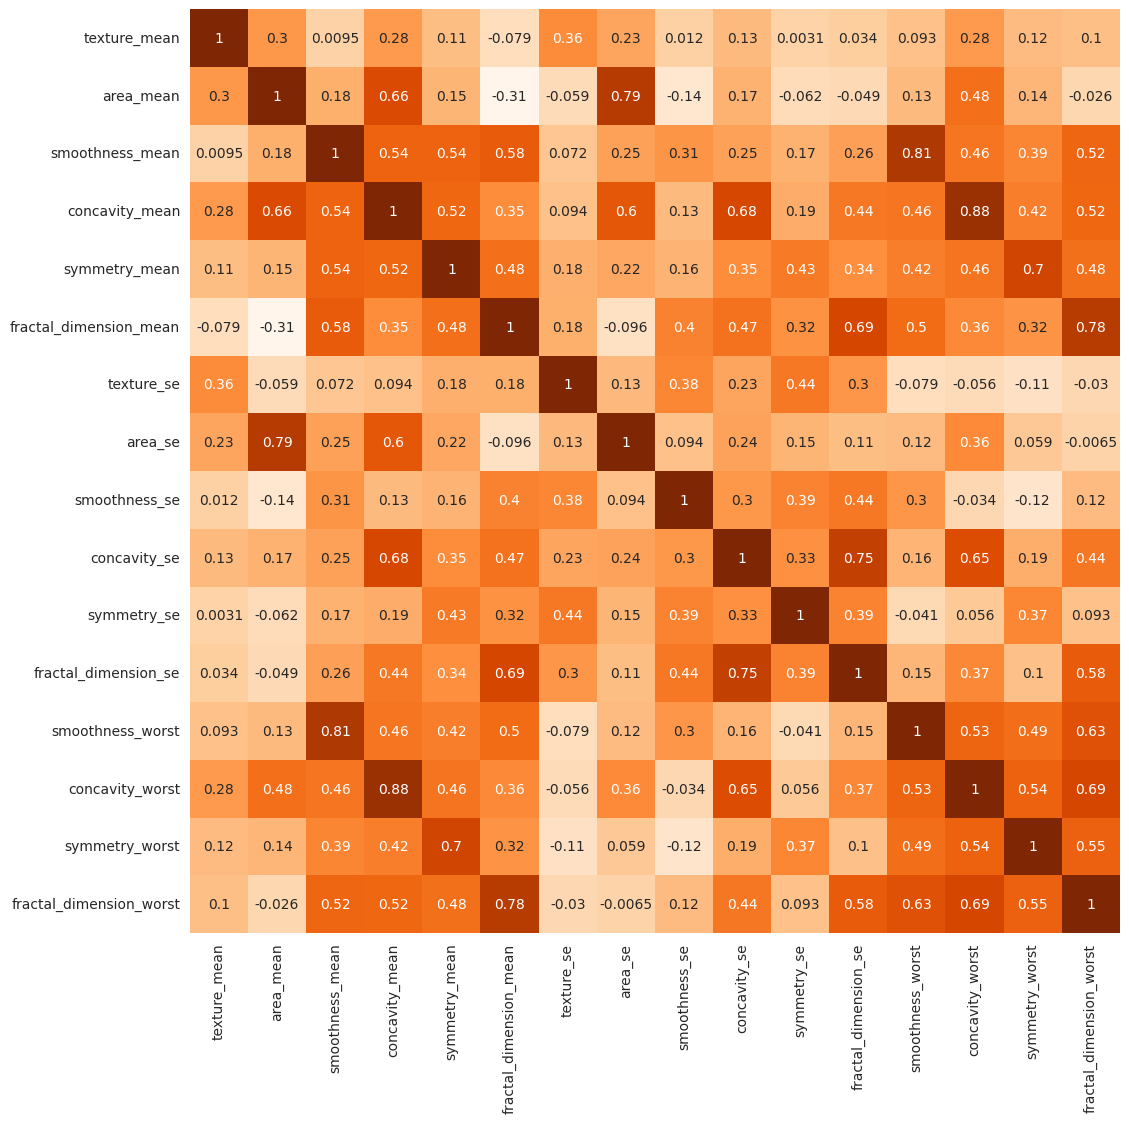

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True,cmap='Oranges',cbar=False)

### over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train , y_train = smote.fit_resample(x_train,y_train)

x_train.shape,y_train.shape

((572, 16), (572,))

### Scaling by StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
# X_train = (x_train - x_train.mean()) / (x_train.std())
# X_test = (x_test - x_test.mean()) / (x_test.std())

### handling outliers by using winsorize


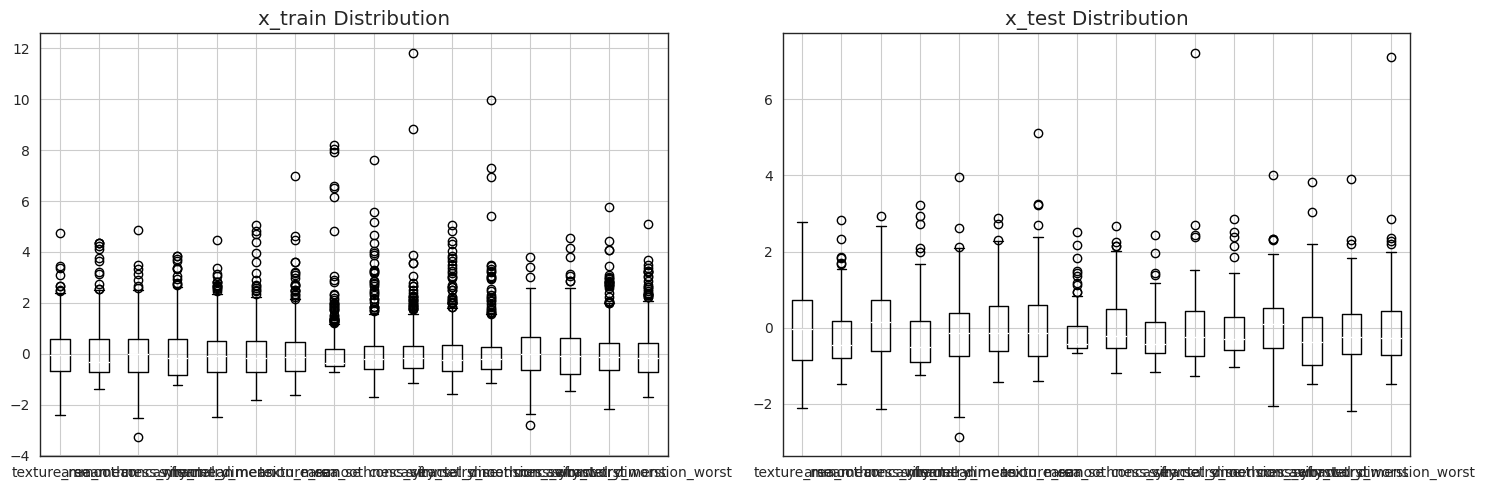

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

X_train.boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')
X_test.boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

for column_name in X_train.columns:

  # X_train[column_name] = np.log1p(X_train[column_name])
  X_train[column_name] = winsorize(X_train[column_name], limits=[0.05, 0.05])

  # X_test[column_name] = np.log1p(X_test[column_name])
  X_test[column_name] = winsorize(X_test[column_name], limits=[0.05, 0.05])

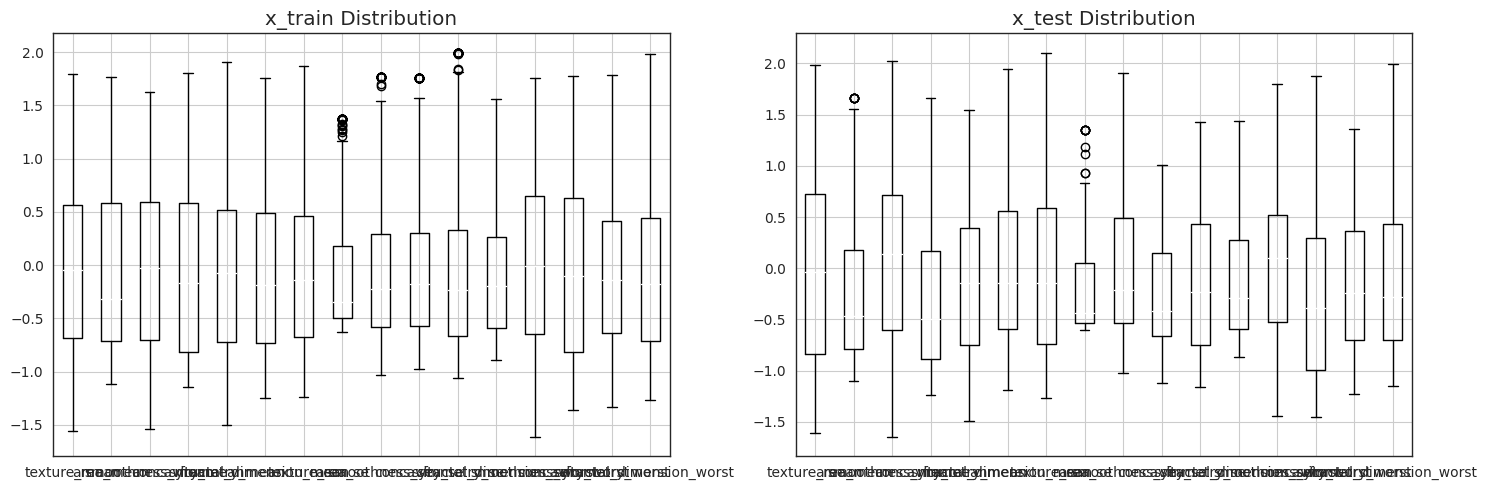

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

X_train.boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')
X_test.boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

# **comparing different models**

KNN: 0.865366 (0.051472)
RF: 0.966848 (0.021204)
XGB: 0.961615 (0.031026)
BC: 0.942377 (0.041412)
EX_Trees: 0.970387 (0.020500)


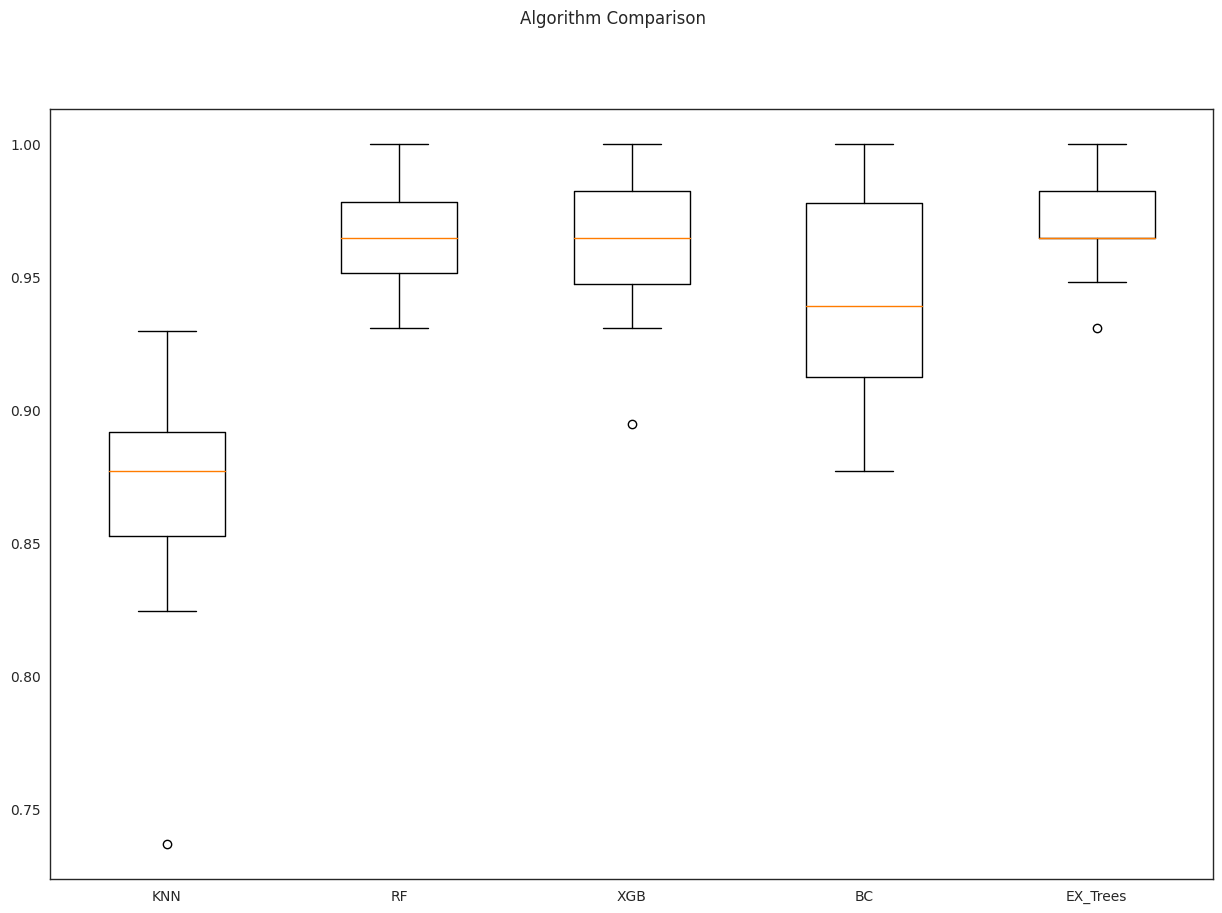

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('XGB', XGBClassifier(random_state = 12345)))
models.append(("BC", BaggingClassifier(random_state = 12345)))
models.append(("EX_Trees", ExtraTreesClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10)

        cv_results = cross_val_score(model, x_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RD_model = RandomForestClassifier()
RD_model.fit(X_train,y_train)
y_pred = RD_model.predict(X_test)

<Axes: >

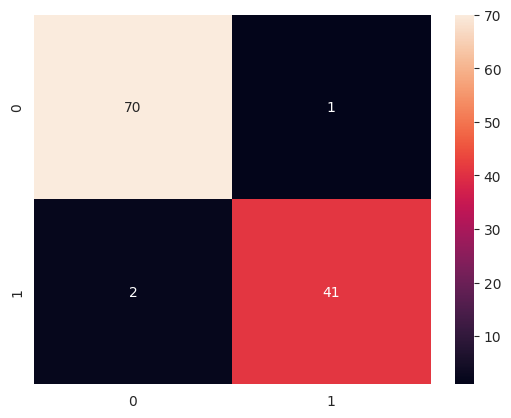

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.9736842105263158,
 0.9534883720930233,
 0.9761904761904762,
 0.9647058823529412)

### Hyperparameter tuning for RandomForestClassifier by Optuna

In [ ]:
!pip install --quiet optuna
import optuna

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    random_state = trial.suggest_int('random_state', 1, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and train the Random Forest model with the suggested hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Set up the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=best_params['random_state']
)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

[I 2024-02-11 04:14:24,347] A new study created in memory with name: no-name-b93d9519-d3eb-4d41-b152-42ef1afac1cc
[I 2024-02-11 04:14:24,743] Trial 0 finished with value: 0.9736842105263158 and parameters: {'n_estimators': 167, 'random_state': 88, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-11 04:14:24,978] Trial 1 finished with value: 0.9736842105263158 and parameters: {'n_estimators': 95, 'random_state': 114, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-11 04:14:25,412] Trial 2 finished with value: 0.9736842105263158 and parameters: {'n_estimators': 177, 'random_state': 160, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-11 04:14:25,724] Trial 3 finished with value: 0.9736842105263

Best Hyperparameters: {'n_estimators': 167, 'random_state': 88, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Accuracy on Test Set: 0.9736842105263158


In [ ]:
rf_model = RandomForestClassifier(
        n_estimators=77,
        max_depth=18,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features='auto',
        random_state=48
    )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

<Axes: >

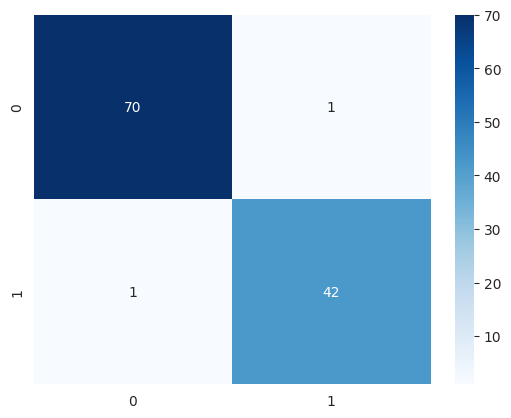

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.9824561403508771,
 0.9767441860465116,
 0.9767441860465116,
 0.9767441860465116)

### Hyperparameter tuning for XGBClassifier by Optuna

In [ ]:
#!pip install --quiet optuna
import optuna
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 0, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'random_state': trial.suggest_int('random_state', 0, 200),
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Use the best model for predictions
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

[I 2024-02-11 04:14:45,169] A new study created in memory with name: no-name-4e2efe59-b1c0-4ef7-a077-a5d8d91b63db
[I 2024-02-11 04:14:46,439] Trial 0 finished with value: 0.9824561403508771 and parameters: {'n_estimators': 126, 'max_depth': 1, 'learning_rate': 0.09791182844663618, 'subsample': 0.36217319205057374, 'colsample_bytree': 0.16306446139216207, 'random_state': 164}. Best is trial 0 with value: 0.9824561403508771.
[I 2024-02-11 04:14:47,047] Trial 1 finished with value: 0.9736842105263158 and parameters: {'n_estimators': 120, 'max_depth': 2, 'learning_rate': 0.09529447339066872, 'subsample': 0.47345743733184553, 'colsample_bytree': 0.9085190351853933, 'random_state': 83}. Best is trial 0 with value: 0.9824561403508771.
[I 2024-02-11 04:14:47,298] Trial 2 finished with value: 0.9824561403508771 and parameters: {'n_estimators': 145, 'max_depth': 2, 'learning_rate': 0.08899402137405257, 'subsample': 0.74267613894737, 'colsample_bytree': 0.9963154180290538, 'random_state': 113}. B

Best Hyperparameters: {'n_estimators': 92, 'max_depth': 2, 'learning_rate': 0.08691862944732621, 'subsample': 0.12133161197553852, 'colsample_bytree': 0.8418648876684829, 'random_state': 141}
Best Accuracy: 0.9912280701754386
Test Set Accuracy: 0.9912280701754386


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=130 ,
    max_depth=13 ,
    learning_rate=0.09949396469306654 ,
    subsample= 0.6746371501786576,
    colsample_bytree=0.9752149403442909,
    random_state= 132
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

<Axes: >

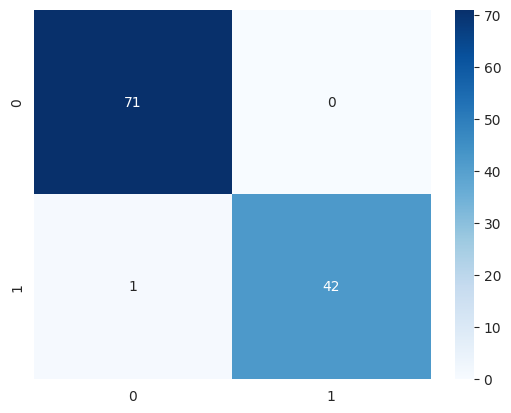

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.9912280701754386, 0.9767441860465116, 1.0, 0.988235294117647)

### Hyperparameter tuning for ExtraTreesClassifier by Optuna

In [ ]:
#!pip install --quiet optuna
import optuna
from sklearn.ensemble import ExtraTreesClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'random_state' : trial.suggest_int('random_state', 1, 200)

    }

    model = ExtraTreesClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Use the best model for predictions
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

[I 2024-02-11 04:15:19,552] A new study created in memory with name: no-name-ce5c7d42-58f5-49df-a8f7-7dd02f20735b
[I 2024-02-11 04:15:20,256] Trial 0 finished with value: 0.9473684210526315 and parameters: {'n_estimators': 177, 'max_depth': 14, 'min_samples_split': 0.45340378292950767, 'min_samples_leaf': 0.13602001268588118, 'max_features': 0.8463934533649562, 'random_state': 16}. Best is trial 0 with value: 0.9473684210526315.
[I 2024-02-11 04:15:20,525] Trial 1 finished with value: 0.9385964912280702 and parameters: {'n_estimators': 77, 'max_depth': 5, 'min_samples_split': 0.7803461782191424, 'min_samples_leaf': 0.16667370292388572, 'max_features': 0.3735929240335295, 'random_state': 102}. Best is trial 0 with value: 0.9473684210526315.
[I 2024-02-11 04:15:20,737] Trial 2 finished with value: 0.9035087719298246 and parameters: {'n_estimators': 64, 'max_depth': 17, 'min_samples_split': 0.21531450145359082, 'min_samples_leaf': 0.289193892503558, 'max_features': 0.2007368915312331, 'ra

Best Hyperparameters: {'n_estimators': 156, 'max_depth': 10, 'min_samples_split': 0.45785912468424655, 'min_samples_leaf': 0.10116391003406641, 'max_features': 0.9457053360326844, 'random_state': 10}
Best Accuracy: 0.9649122807017544
Test Set Accuracy: 0.9649122807017544


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

EX_model = ExtraTreesClassifier(
    n_estimators=196,
    max_depth=3,
    min_samples_split=0.8458133085893886,
    min_samples_leaf=0.12437752453855933,
    max_features=0.4561247175832782,
    random_state=180
    )

EX_model.fit(X_train,y_train)
y_pred = EX_model.predict(X_test)

<Axes: >

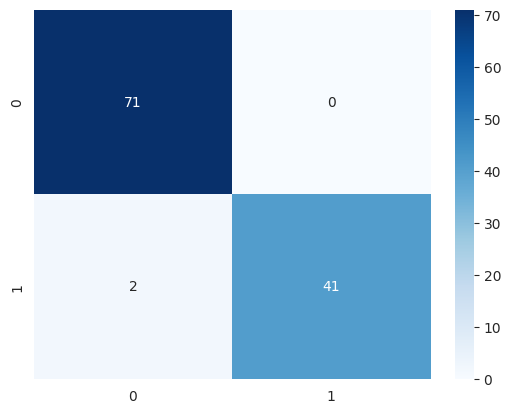

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.9824561403508771, 0.9534883720930233, 1.0, 0.9761904761904763)

# Ensemble model

### Hard Voting

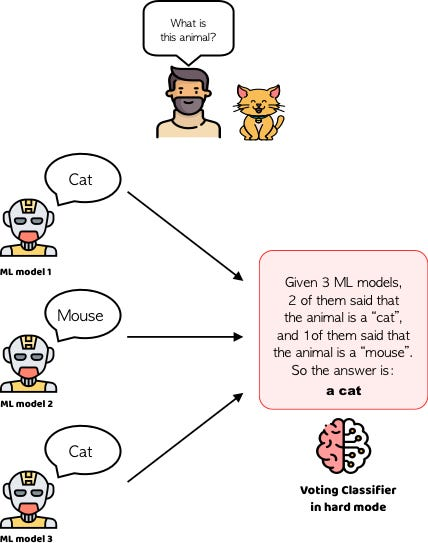

In [ ]:
from sklearn.ensemble import VotingClassifier

Final_Model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgb_classifier', xgb_model),
        ('ExtraTrees', EX_model)
    ],
    voting='hard'
)

# Train the ensemble model
Final_Model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Final_Model.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy (Hard Voting):", accuracy)

Test Set Accuracy (Hard Voting): 0.9912280701754386


<Axes: >

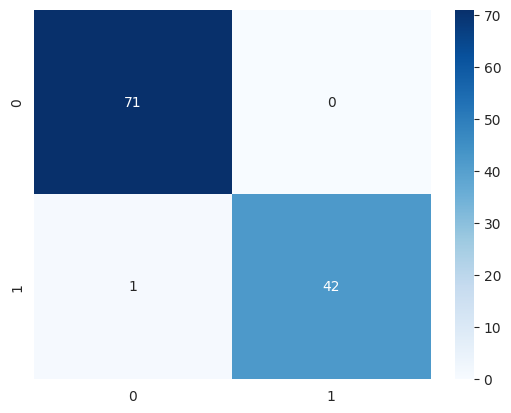

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.9912280701754386, 0.9767441860465116, 1.0, 0.988235294117647)

# Save the model

In [ ]:
import joblib

# Save the model
joblib.dump(Final_Model, 'Final_Model_model.joblib')

['Final_Model_model.joblib']